In [1]:
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix

Using TensorFlow backend.


In [2]:
yes=os.listdir('../input/brain_tumor_dataset/yes')
no=os.listdir('../input/brain_tumor_dataset/no')

In [3]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [4]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [5]:
len(data_target)==len(data)

True

In [6]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
data

array(['Y98.JPG', 'Y155.JPG', 'Y251.JPG', 'Y243.JPG', 'Y242.JPG',
       'Y60.jpg', 'Y113.JPG', 'Y111.JPG', 'Y167.JPG', 'Y34.jpg',
       'Y255.JPG', 'Y254.jpg', 'Y56.jpg', 'Y40.JPG', 'Y9.jpg', 'Y3.jpg',
       'Y104.jpg', 'Y79.jpg', 'Y180.jpg', 'Y81.jpg', 'Y109.JPG',
       'Y153.jpg', 'Y50.JPG', 'Y8.jpg', 'Y61.jpg', 'Y256.JPG', 'Y12.jpg',
       'Y49.JPG', 'Y107.jpg', 'Y19.JPG', 'Y95.jpg', 'Y92.png', 'Y51.jpg',
       'Y182.JPG', 'Y24.jpg', 'Y249.JPG', 'Y21.jpg', 'Y55.jpg', 'Y32.jpg',
       'Y26.jpg', 'Y78.jpg', 'Y120.JPG', 'Y100.JPG', 'Y47.JPG',
       'Y156.JPG', 'Y41.jpg', 'Y183.jpg', 'Y259.JPG', 'Y193.JPG',
       'Y13.jpg', 'Y117.JPG', 'Y42.jpg', 'Y70.jpg', 'Y188.jpg', 'Y16.JPG',
       'Y71.JPG', 'Y99.JPG', 'Y147.JPG', 'Y257.jpg', 'Y106.jpg',
       'Y112.JPG', 'Y157.JPG', 'Y44.JPG', 'Y248.JPG', 'Y23.JPG',
       'Y160.JPG', 'Y246.JPG', 'Y169.jpg', 'Y15.jpg', 'Y66.JPG',
       'Y159.JPG', 'Y86.JPG', 'Y146.JPG', 'Y7.jpg', 'Y166.JPG',
       'Y164.JPG', 'Y54.jpg', 'Y77.jpg', 'Y4

In [8]:
yes_values=os.listdir('../input/brain_tumor_dataset/yes')
no_values=os.listdir('../input/brain_tumor_dataset/no')

In [9]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('../input/brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [10]:
#X_data =[]
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('../input/brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [11]:
len(X_data)==len(data)==len(data_target)

True

In [12]:
X = np.squeeze(X_data)


In [13]:
X.shape


(253, 32, 32, 3)

In [14]:
# normalize data
X = X.astype('float32')
X /= 255

In [15]:
#categorical_labels = to_categorical(data_target, num_classes=2)


In [16]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

In [18]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())



model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



# Take a look at the model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 16, 16, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
batch_normalization_v

In [19]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])


In [20]:
history = model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=50,
         validation_data=(x_valid, y_valid),)


Train on 190 samples, validate on 63 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
190/190 [==============================] - 2s 11ms/sample - loss: 0.9095 - acc: 0.5211 - val_loss: 0.7123 - val_acc: 0.1111
Epoch 2/50
190/190 [==============================] - 1s 4ms/sample - loss: 0.7374 - acc: 0.6158 - val_loss: 0.7167 - val_acc: 0.0794
Epoch 3/50
190/190 [==============================] - 1s 4ms/sample - loss: 0.6860 - acc: 0.6316 - val_loss: 0.7271 - val_acc: 0.0159
Epoch 4/50
190/190 [==============================] - 1s 4ms/sample - loss: 0.6418 - acc: 0.6474 - val_loss: 0.7548 - val_acc: 0.0000e+00
Epoch 5/50
190/190 [==============================] - 1s 4ms/sample - loss: 0.6539 - acc: 0.6737 - val_loss: 0.7580 - val_acc: 0.0000e+00
Epoch 6/50
190/190 [==============================] - 1s 4ms/sample - loss: 0.5699 - acc: 0.6947 - val_loss: 0.7764 - val_acc: 0.0000e+00
Epoch 7/50
190/190 [==============================] - 1s 4ms/sample - loss: 0.6177 - acc: 

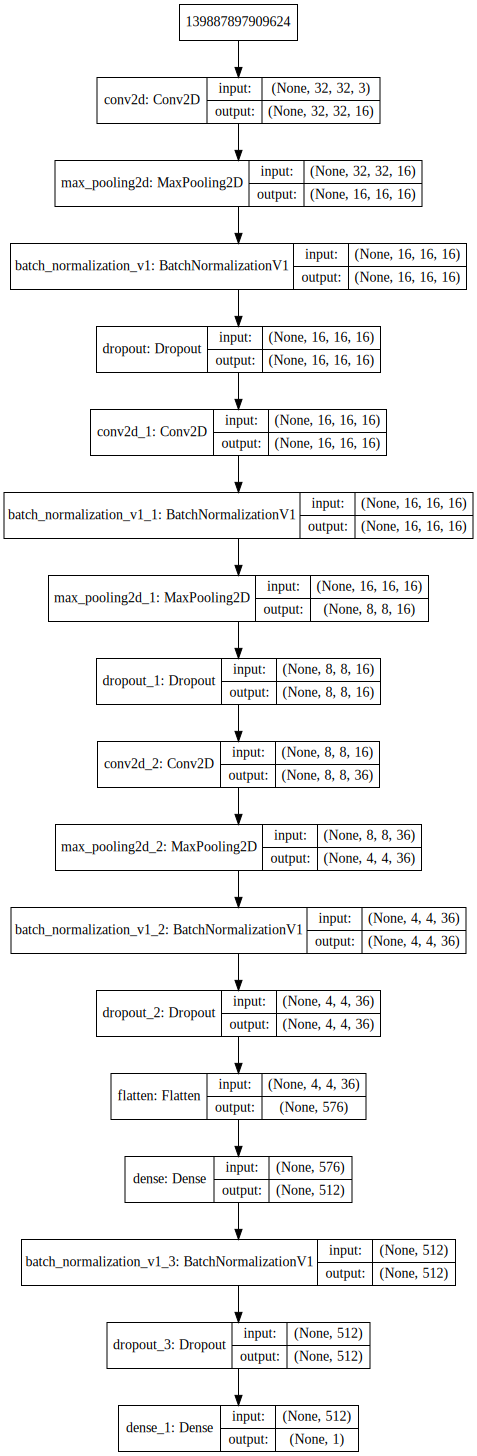

In [21]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [22]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.95238096


In [23]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

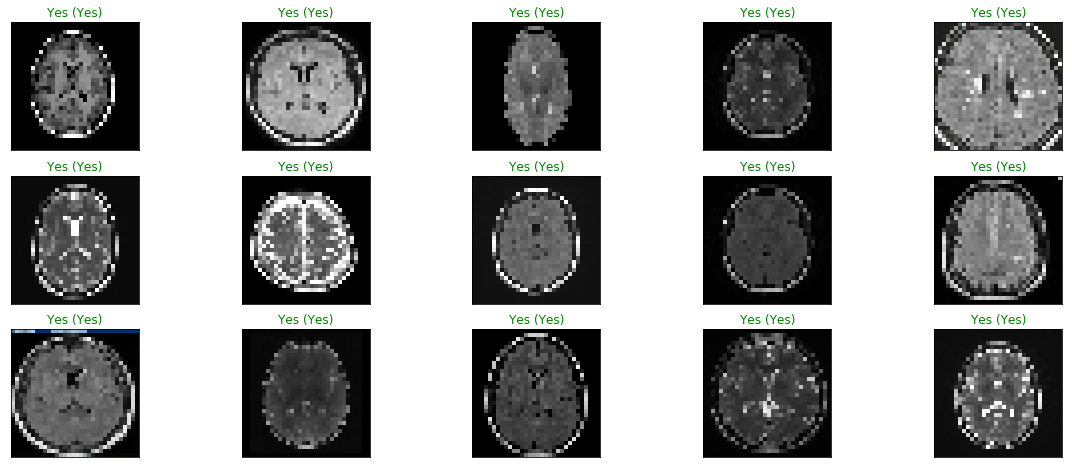

In [24]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

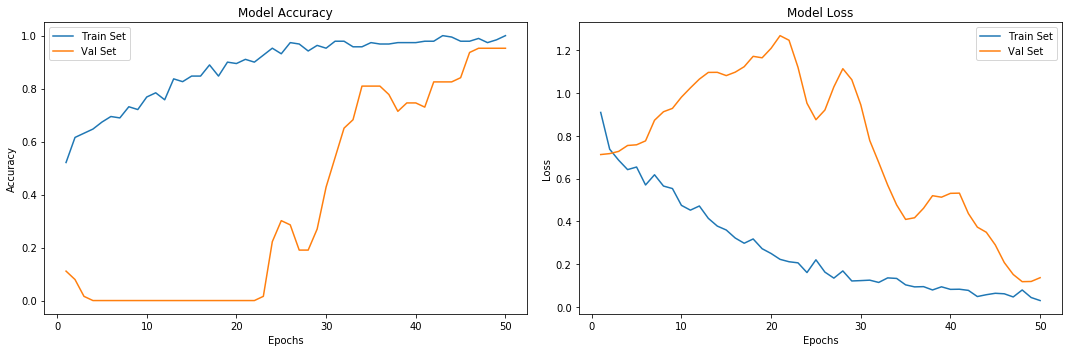

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [26]:
predictions = model.predict(x_valid)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_valid, predictions)
print('Val Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_valid, predictions) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

Val Accuracy = 0.95


NameError: name 'plot_confusion_matrix' is not defined